### what do we want in a box score?

In [1]:
#total stats and per-point-played stats
#from left to right
#name,position
#points played (o/d)
#touches, +/-, goals, assists, hockey assists, d's, turns
#yardage gained (throw/rec)
#score rate
#team totals at the bottom

In [2]:
#set up a way to host all 

In [3]:
#determine the qualifier between o points and d points
#how many more yards are gained on o points than d points
#can use this as some sort of measuring stick to qualify players offensive performance

#automatically categorize handlers, cutters, and flex by some formula of their data
#automatically categorize offense and defense players by some formula of their data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from pdb import set_trace
import glob

### COMBINE GAMExGAME POSSESSION DATA INTO ONE POSS_DF

In [5]:
#give file path abbreviation
poss_path_abbr = '/Users/maxcohen/Documents/Blueprint Stats/Possessions vs.*.csv'
#create list of files that match the possession convention
file_list = glob.glob(poss_path_abbr)
#create an empty df
poss_df = pd.DataFrame()
#loop through each file in the list
for file in file_list:
    #add an oppnent depending on the name of the file
    opponent = file.split('vs. ')[1].split(' 2019')[0]
    df_ = pd.read_csv(file)
    #add oppenent name column
    df_['opponent'] = opponent
    #append file to the overall poss_df
    poss_df = poss_df.append(df_)

### COMBINE GAMExGAME PASSES DATA INTO ONE PASSES_DF

In [6]:
#give file path abbreviation
passes_path_abbr = '/Users/maxcohen/Documents/Blueprint Stats/Passes vs.*.csv'
#create list of files that match the passes convention
file_list = glob.glob(passes_path_abbr)
#create an empty df
passes_df = pd.DataFrame()
#loop through each file in the list
for file in file_list:
    #add an oppnent depending on the name of the file
    opponent = file.split('vs. ')[1].split(' 2019')[0]
    df_ = pd.read_csv(file)
    #add oppenent name column
    df_['opponent'] = opponent
    #append file to the overall passes_df
    passes_df = passes_df.append(df_)

#remove all of the empty data with no thrower nor reciever
passes_df = passes_df.dropna(subset=['Thrower', 'Receiver'])

### MERGE THE PASSES_DF WITH THE POSS_DF

In [7]:
full_poss_df = pd.merge(passes_df,poss_df,how='left',on=['Point','Possession','opponent'],copy=False)
full_poss_df = full_poss_df.reset_index(drop=True)
full_poss_df = full_poss_df.drop(columns=['Created_y','Start X (0 -> 1 = left sideline -> right sideline)_y',
                  'Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)_y'])
full_poss_df.to_csv('/Users/maxcohen/Documents/Blueprint Stats/BP_2019_Full_Possession_Data.csv')

In [8]:
full_poss_df.columns = [x.replace('_x','') for x in full_poss_df.columns]

In [9]:
full_poss_df.columns

Index(['Created', 'Point', 'Possession', 'Thrower', 'Receiver', 'Turnover?',
       'Thrower error?', 'Receiver error?', 'Throw to endzone?', 'Assist?',
       'Secondary assist?', 'Huck?', 'Swing?', 'Dump?', 'From sideline?',
       'To sideline?', 'Distance (m)', 'Forward distance (m)',
       'Left-to-right distance (m)',
       'Start X (0 -> 1 = left sideline -> right sideline)',
       'Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)',
       'End X (0 -> 1 = left sideline -> right sideline)',
       'End Y (0 -> 1 = back of opponent endzone -> back of own endzone)',
       'opponent', 'Started point on offense?', 'Scored?', 'Initiator',
       'Passes', 'Secondary assist', 'Assist', 'Goal', 'Thrower error',
       'Receiver error', 'Stalled out'],
      dtype='object')

In [10]:
full_poss_df['opponent'].unique()

array(['Lost  Boys', 'HIP', 'Vault', 'Big Wrench', 'Citywide', 'Shade',
       'Red Circus', 'El Nino', 'Floodwall', 'Lantern'], dtype=object)

In [11]:
opponent_grp = full_poss_df.groupby(['opponent'])

In [12]:
opponent_grp.get_group('Citywide')

,Created,Point,Possession,Thrower,Receiver,Turnover?,Thrower error?,Receiver error?,Throw to endzone?,Assist?,...,Started point on offense?,Scored?,Initiator,Passes,Secondary assist,Assist,Goal,Thrower error,Receiver error,Stalled out
494,2020-02-17 15:52:29,2,1,Evan Ma,Owen Marschall,0,0,0,0,0,...,1,1,Evan Ma,14,Evan Ma,Max Cohen,Eliot Bemis,NaN,NaN,NaN
495,2020-02-17 15:52:33,2,1,Owen Marschall,Evan Ma,0,0,0,0,0,...,1,1,Evan Ma,14,Evan Ma,Max Cohen,Eliot Bemis,NaN,NaN,NaN
496,2020-02-17 15:52:41,2,1,Evan Ma,Owen Marschall,0,0,0,0,0,...,1,1,Evan Ma,14,Evan Ma,Max Cohen,Eliot Bemis,NaN,NaN,NaN
497,2020-02-17 15:52:50,2,1,Owen Marschall,Max Cohen,0,0,0,0,0,...,1,1,Evan Ma,14,Evan Ma,Max Cohen,Eliot Bemis,NaN,NaN,NaN
498,2020-02-17 15:52:54,2,1,Max Cohen,Ian McInerney,0,0,0,0,0,...,1,1,Evan Ma,14,Evan Ma,Max Cohen,Eliot Bemis,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,2020-02-17 16:24:23,19,1,Victor Kao,Nadav Pearl,0,0,0,0,0,...,0,1,Nadav Pearl,8,Victor Kao,Nadav Pearl,Josh Imhoff,NaN,NaN,NaN
579,2020-02-17 16:24:27,19,1,Nadav Pearl,Josh Imhoff,0,0,0,1,1,...,0,1,Nadav Pearl,8,Victor Kao,Nadav Pearl,Josh Imhoff,NaN,NaN,NaN
580,2020-02-17 16:25:52,20,1,Ruozhou Ye,Jesse Gan,0,0,0,0,0,...,0,1,Ruozhou Ye,3,Jesse Gan,Geo Zheng,Swan,NaN,NaN,NaN
581,2020-02-17 16:25:54,20,1,Jesse Gan,Geo Zheng,0,0,0,0,0,...,0,1,Ruozhou Ye,3,Jesse Gan,Geo Zheng,Swan,NaN,NaN,NaN


In [13]:
opponent_grp['Receiver'].value_counts(normalize=True).head(300).loc['Red Circus']

Receiver
Victor Kao        0.179487
Max Cohen         0.170940
Carter Thallon    0.102564
Eliot Bemis       0.076923
Sam Pollack       0.076923
Jeff Voss         0.051282
Owen Marschall    0.051282
Andrew Edelman    0.042735
Geo Zheng         0.042735
Gabe Stump        0.034188
Odie              0.034188
Ruozhou Ye        0.025641
Sam Feder         0.025641
Carter Wang       0.017094
Jon Kwan          0.017094
Towell            0.017094
Ian McInerney     0.008547
Josh Imhoff       0.008547
Stouf             0.008547
Swan              0.008547
Name: Receiver, dtype: float64

In [14]:
opponent_grp['Passes'].agg(['median','mean']).loc['Citywide']

median    8.000000
mean      8.573034
Name: Citywide, dtype: float64

In [15]:
for x in full_poss_df.index:
    full_poss_df.loc[x,'possession_index'] = full_poss_df.loc[x,'opponent'] + ' | ' + \
    str(full_poss_df.loc[x,'Point']) + '.' + \
    str(full_poss_df.loc[x,'Possession'])

In [16]:
unique_poss_df = full_poss_df.drop_duplicates(['possession_index','Passes'])

In [17]:
unique_poss_df

,Created,Point,Possession,Thrower,Receiver,Turnover?,Thrower error?,Receiver error?,Throw to endzone?,Assist?,...,Scored?,Initiator,Passes,Secondary assist,Assist,Goal,Thrower error,Receiver error,Stalled out,possession_index
0,2020-02-26 22:56:29,1,1,Evan Ma,Max Cohen,0,0,0,0,0,...,1,Evan Ma,7,Carter Thallon,Odie,Eliot Bemis,NaN,NaN,NaN,Lost Boys | 1.1
7,2020-02-26 22:58:06,2,1,Andrew Edelman,Josh Imhoff,0,0,0,0,0,...,1,Andrew Edelman,2,Andrew Edelman,Josh Imhoff,Sam Alston,NaN,NaN,NaN,Lost Boys | 2.1
9,2020-02-26 22:59:21,3,1,Andrew Edelman,Geo Zheng,0,0,0,0,0,...,0,Andrew Edelman,5,NaN,NaN,NaN,Stouf,NaN,NaN,Lost Boys | 3.1
14,2020-02-26 23:00:22,3,2,Andrew Edelman,Towell,0,0,0,0,0,...,0,Andrew Edelman,3,NaN,NaN,NaN,Andrew Edelman,NaN,NaN,Lost Boys | 3.2
17,2020-02-26 23:08:14,4,1,Evan Ma,Max Cohen,0,0,0,0,0,...,0,Evan Ma,6,NaN,NaN,NaN,Evan Ma,NaN,NaN,Lost Boys | 4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,2020-02-18 18:56:30,10,1,Max Cohen,Carter Thallon,0,0,0,0,0,...,0,Max Cohen,6,NaN,NaN,NaN,Jeff Voss,NaN,NaN,Lantern | 10.1
1146,2020-02-18 18:57:27,10,2,Geo Zheng,Max Cohen,0,0,0,0,0,...,1,Geo Zheng,7,Jeff Voss,Carter Thallon,Sam Pollack,NaN,NaN,NaN,Lantern | 10.2
1153,2020-02-18 18:59:11,12,1,Owen Marschall,Max Cohen,0,0,0,0,0,...,0,Owen Marschall,4,NaN,NaN,NaN,Odie,NaN,NaN,Lantern | 12.1
1157,2020-02-18 19:00:03,12,2,Max Cohen,Odie,0,0,0,1,1,...,1,Max Cohen,1,NaN,Max Cohen,Odie,NaN,NaN,NaN,Lantern | 12.2


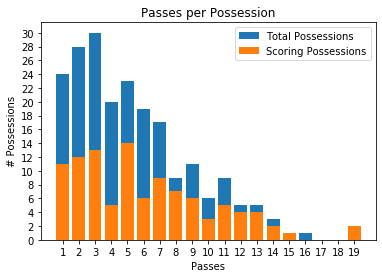

In [18]:
#create passes per possession bar chart
from collections import Counter

pass_count_list = sorted(unique_poss_df['Passes'])
c = Counter(pass_count_list)
plt.bar(c.keys(),c.values(),label='Total Possessions')

score_unique_poss_df = unique_poss_df[unique_poss_df['Scored?'] == 1]
score_pass_count_list = sorted(score_unique_poss_df['Passes'])
d = Counter(score_pass_count_list)
plt.bar(d.keys(),d.values(),label='Scoring Possessions')

plt.xticks(np.arange(1,max(sorted(np.unique(pass_count_list)))+1))
plt.yticks(np.arange(max(c.values())+1,step=2))
plt.xlabel('Passes')
plt.ylabel('# Possessions')
plt.title('Passes per Possession')
plt.legend()
plt.savefig('/Users/maxcohen/Documents/Blueprint Stats/figs/passes_per_possession.png', dpi=300)
plt.show()

In [19]:
most_passes = full_poss_df['Passes'].max()
full_poss_df[full_poss_df['Passes'] == most_passes]

,Created,Point,Possession,Thrower,Receiver,Turnover?,Thrower error?,Receiver error?,Throw to endzone?,Assist?,...,Scored?,Initiator,Passes,Secondary assist,Assist,Goal,Thrower error,Receiver error,Stalled out,possession_index
868,2020-02-27 22:02:48,9,1,Evan Ma,Max Cohen,0,0,0,0,0,...,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN,El Nino | 9.1
869,2020-02-27 22:02:54,9,1,Max Cohen,Victor Kao,0,0,0,0,0,...,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN,El Nino | 9.1
870,2020-02-27 22:02:59,9,1,Victor Kao,Max Cohen,0,0,0,0,0,...,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN,El Nino | 9.1
871,2020-02-27 22:03:04,9,1,Max Cohen,Victor Kao,0,0,0,0,0,...,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN,El Nino | 9.1
872,2020-02-27 22:03:09,9,1,Victor Kao,Ian McInerney,0,0,0,0,0,...,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN,El Nino | 9.1
873,2020-02-27 22:03:15,9,1,Ian McInerney,Max Cohen,0,0,0,0,0,...,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN,El Nino | 9.1
874,2020-02-27 22:03:23,9,1,Max Cohen,Victor Kao,0,0,0,0,0,...,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN,El Nino | 9.1
875,2020-02-27 22:03:26,9,1,Victor Kao,Evan Ma,0,0,0,0,0,...,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN,El Nino | 9.1
876,2020-02-27 22:03:43,9,1,Evan Ma,Max Cohen,0,0,0,0,0,...,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN,El Nino | 9.1
877,2020-02-27 22:03:48,9,1,Max Cohen,Victor Kao,0,0,0,0,0,...,1,Evan Ma,19,Ian McInerney,Eliot Bemis,Gabe Stump,NaN,NaN,NaN,El Nino | 9.1


In [20]:
turnover_df = full_poss_df[full_poss_df['Thrower error?'] == 1]

In [21]:
assist_df = full_poss_df[full_poss_df['Assist?'] == 1]

In [22]:
just_throw_df = full_poss_df[(full_poss_df['Assist?'] == 0) & (full_poss_df['Thrower error?'] == 0)]

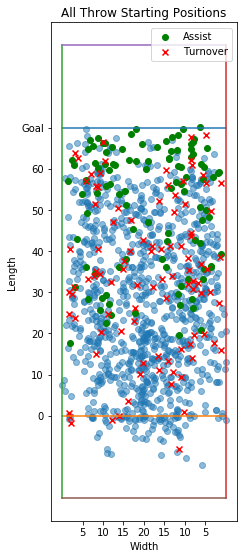

In [71]:
#scatter plot of all throwing positions
fig = plt.figure(figsize=(4/1.2,11/1.2))
plt.scatter(just_throw_df['Start X (0 -> 1 = left sideline -> right sideline)'],
           1-just_throw_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],
           alpha=.5)

plt.scatter(assist_df['Start X (0 -> 1 = left sideline -> right sideline)'],
           1-assist_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],
           alpha=1,
            c='g',
            label='Assist')

plt.scatter(turnover_df['Start X (0 -> 1 = left sideline -> right sideline)'],
           1-turnover_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],
           alpha=1,
            marker='x',
            c='r',
            label='Turnover')

#attacking endzone line
x1 = [0,1]
y1 = [.8181818,.8181818]
plt.plot(x1,y1)

#defending endzone line
x2 = [0,1]
y2 = [.1818181,.1818181]
plt.plot(x2,y2)

#backhand sideline
x3 = [0,0]
y3 = [0,1]
plt.plot(x3,y3)

#flick sideline
x4 = [1,1]
y4 = [0,1]
plt.plot(x4,y4)

#attacking backline
x5 = [0,1]
y5 = [1,1]
plt.plot(x5,y5)

#defending backline
x6 = [0,1]
y6 = [0,0]
plt.plot(x6,y6)

xtick = .25/2
ytick = .181818/2

plt.xticks(ticks=[xtick,xtick*2,xtick*3,xtick*4,xtick*5,xtick*6,xtick*7],
          labels=[5,10,15,20,15,10,5])
plt.yticks(ticks=[ytick*2,ytick*3,ytick*4,ytick*5,ytick*6,ytick*7,ytick*8,ytick*9],
          labels=[0,10,20,30,40,50,60,'Goal'])
plt.xlabel('Width')
plt.ylabel('Length')
plt.legend(loc='upper right')
plt.title('All Throw Starting Positions')

plt.show()
fig.savefig('/Users/maxcohen/Documents/Blueprint Stats/figs/throw_start_scatter.png',dpi=300)

In [68]:
11/3

3.6666666666666665

In [24]:
#create chart that shows scoring probbality of scoring based on distance from the attacking endzone

In [25]:
#create bins every two yards
bin_list = []
yardage = 3
for x in range(-3,109,yardage):
    bin_list.append(x + yardage)
    
bins = np.array(bin_list)

In [26]:
#change bins to 0->1 range
bins = [x/110 for x in bins]
bins

[0.0,
 0.02727272727272727,
 0.05454545454545454,
 0.08181818181818182,
 0.10909090909090909,
 0.13636363636363635,
 0.16363636363636364,
 0.19090909090909092,
 0.21818181818181817,
 0.24545454545454545,
 0.2727272727272727,
 0.3,
 0.32727272727272727,
 0.35454545454545455,
 0.38181818181818183,
 0.4090909090909091,
 0.43636363636363634,
 0.4636363636363636,
 0.4909090909090909,
 0.5181818181818182,
 0.5454545454545454,
 0.5727272727272728,
 0.6,
 0.6272727272727273,
 0.6545454545454545,
 0.6818181818181818,
 0.7090909090909091,
 0.7363636363636363,
 0.7636363636363637,
 0.7909090909090909,
 0.8181818181818182,
 0.8454545454545455,
 0.8727272727272727,
 0.9,
 0.9272727272727272,
 0.9545454545454546,
 0.9818181818181818,
 1.009090909090909]

In [27]:
full_poss_df['y_bucket'] = pd.cut(full_poss_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],
                              bins)
full_poss_df['y_bucket']

0       (0.791, 0.818]
1       (0.764, 0.791]
2       (0.736, 0.764]
3       (0.682, 0.709]
4       (0.627, 0.655]
             ...      
1158    (0.709, 0.736]
1159    (0.655, 0.682]
1160    (0.545, 0.573]
1161    (0.409, 0.436]
1162    (0.245, 0.273]
Name: y_bucket, Length: 1163, dtype: category
Categories (37, interval[float64]): [(0.0, 0.0273] < (0.0273, 0.0545] < (0.0545, 0.0818] < (0.0818, 0.109] ... (0.9, 0.927] < (0.927, 0.955] < (0.955, 0.982] < (0.982, 1.009]]

In [28]:
all_hist = np.histogram(1-full_poss_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],bins)
len(all_hist[0])

37

In [29]:
scored_df = full_poss_df[full_poss_df['Scored?'] == 1]

In [30]:
scored_hist = np.histogram(1-scored_df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'],bins)
len(scored_hist[0])

37

In [31]:
all_y = all_hist[0]
scored_y = scored_hist[0]
bins_data = bins[:-1]
d = {'all_y':all_y, 'scored_y':scored_y, 'bins':bins_data}
y_score_df = pd.DataFrame(data = d)

In [32]:
bins[:-1]

[0.0,
 0.02727272727272727,
 0.05454545454545454,
 0.08181818181818182,
 0.10909090909090909,
 0.13636363636363635,
 0.16363636363636364,
 0.19090909090909092,
 0.21818181818181817,
 0.24545454545454545,
 0.2727272727272727,
 0.3,
 0.32727272727272727,
 0.35454545454545455,
 0.38181818181818183,
 0.4090909090909091,
 0.43636363636363634,
 0.4636363636363636,
 0.4909090909090909,
 0.5181818181818182,
 0.5454545454545454,
 0.5727272727272728,
 0.6,
 0.6272727272727273,
 0.6545454545454545,
 0.6818181818181818,
 0.7090909090909091,
 0.7363636363636363,
 0.7636363636363637,
 0.7909090909090909,
 0.8181818181818182,
 0.8454545454545455,
 0.8727272727272727,
 0.9,
 0.9272727272727272,
 0.9545454545454546,
 0.9818181818181818]

In [33]:
y_score_df['conversion_rate'] = y_score_df['scored_y'] / y_score_df['all_y']

In [34]:
y_score_df['yards'] = y_score_df.index * yardage
y_score_df['yards']

0       0
1       3
2       6
3       9
4      12
5      15
6      18
7      21
8      24
9      27
10     30
11     33
12     36
13     39
14     42
15     45
16     48
17     51
18     54
19     57
20     60
21     63
22     66
23     69
24     72
25     75
26     78
27     81
28     84
29     87
30     90
31     93
32     96
33     99
34    102
35    105
36    108
Name: yards, dtype: int64

In [35]:
y_score_df = y_score_df.dropna()
y_score_df = y_score_df[y_score_df['all_y'] > 10]
y_score_df

,all_y,scored_y,bins,conversion_rate,yards
5,16,9,0.136364,0.562500,15
6,61,21,0.163636,0.344262,18
7,38,15,0.190909,0.394737,21
8,32,16,0.218182,0.500000,24
9,57,22,0.245455,0.385965,27
10,45,24,0.272727,0.533333,30
11,58,26,0.300000,0.448276,33
12,65,31,0.327273,0.476923,36
13,57,32,0.354545,0.561404,39
14,55,32,0.381818,0.581818,42


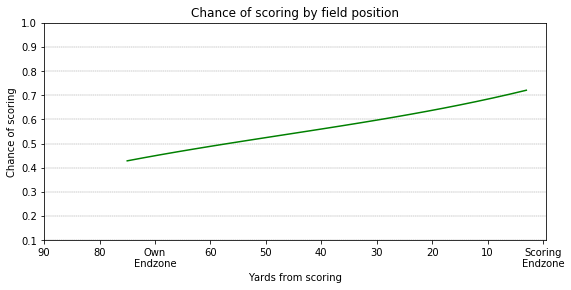

In [65]:
#chance of scoring by field position
fig = plt.figure(figsize=(9,4))

x = y_score_df['yards']
y = y_score_df['conversion_rate']
#plt.scatter(x,y)

z = np.polyfit(x, y, 3)
p = np.poly1d(z)
plt.plot(x,p(x),"g")

xtick = 10
ytick = .1

plt.xticks(ticks=[xtick*9,xtick*8,xtick*7,xtick*6,xtick*5,xtick*4,xtick*3,xtick*2,xtick*1,xtick*0],
          labels=[90,80,'Own\nEndzone',60,50,40,30,20,10,'Scoring\nEndzone'][::-1])
plt.yticks(ticks=[ytick,ytick*2,ytick*3,ytick*4,ytick*5,ytick*6,ytick*7,ytick*8,ytick*9,ytick*10])
plt.xlabel('Yards from scoring')
plt.ylabel('Chance of scoring')
#plt.legend(loc='upper right')
plt.title('Chance of scoring by field position')

plt.grid(which='major', axis='y' ,linestyle='-.', linewidth='.2', color='black')
plt.show()
fig.savefig('/Users/maxcohen/Documents/Blueprint Stats/figs/chance_score_field_position.png',dpi=300, 
            bbox_inches= 'tight')

### ADD ALL GAMES DF

In [ ]:
games_file = '/Users/maxcohen/Documents/Blueprint Stats/Blueprint 2019 Games.csv'
games_df = pd.read_csv(games_file)
games_df

### ADD PLAYER STATS DF

In [ ]:
player_stats_file = '/Users/maxcohen/Documents/Blueprint Stats/Blueprint 2019 Players.csv'
player_stats_df = pd.read_csv(player_stats_file)
player_stats_df

In [ ]:
#change all columns to numeric
column_list = ['Total completed throw distance (m)','Total completed throw gain (m)',
                 'Total caught pass distance (m)']
for i in column_list:
    player_stats_df[i] = [x.replace(',','') for x in player_stats_df[i]]
    player_stats_df[i] = pd.to_numeric(player_stats_df[i])             

In [ ]:
player_stats_df = player_stats_df.set_index('Player')

In [ ]:
player_stats_df.dtypes

In [ ]:
#create a column for "handler/cutter"
position_df = pd.DataFrame(columns=['Player','Position'])

In [ ]:
position_df['Player'] = list(player_stats_df.index)

In [ ]:
position_df['Position'] = ['C','C','C','H','C','H','C','C','C','C','H','C','C','H','C','C','H','C','H','H','C','C',
                          'H','C','C','H','C','H']

In [ ]:
player_stats_df['percent_Opp'] = player_stats_df['Offense points played'] / player_stats_df['Points played total']

In [ ]:
player_stats_df['Line'] = ['Off' if x >= .66 else 'def' if x < .33 else 'Flex' 
                           for x in player_stats_df['percent_Opp']]

In [ ]:
player_stats_df['Line']

In [ ]:
position_df = position_df.set_index('Player')

In [ ]:
player_stats_df = player_stats_df.join(position_df)

### PLUS MINUS TABLE 

In [ ]:
player_stats_df['plus/minus'] = player_stats_df['Goals'] + player_stats_df['Assists'] + \
player_stats_df['Secondary assists']*.5 + player_stats_df['Defensive blocks'] - player_stats_df['Turnovers']

In [ ]:
player_stats_df['offense_plus/minus'] = player_stats_df['Goals'] + player_stats_df['Assists'] + \
player_stats_df['Secondary assists']*.5 - player_stats_df['Turnovers']

In [ ]:
plus_minus = player_stats_df[['Position','Line','Touches','plus/minus','Goals','Assists',
                 'Secondary assists','Defensive blocks','Turnovers']].sort_values(by='plus/minus',ascending=False)
plus_minus

In [ ]:
offense_plus_minus = player_stats_df[['Position','Line','offense_plus/minus','Goals','Assists','Secondary assists',
                                      'Turnovers']].sort_values(by='offense_plus/minus',ascending=False)
offense_plus_minus

In [ ]:
player_stats_df['Turnovers'].sum()

In [ ]:
player_stats_df['Total completed throw distance (m)'].sum() / player_stats_df['Turnovers'].sum()

### TOTAL DISTANCE TABLE

In [ ]:
player_stats_df['dist_throw/turn'] = player_stats_df['Total completed throw distance (m)'] / \
player_stats_df['Thrower errors']

player_stats_df['dist_rec/turn'] = player_stats_df['Total caught pass distance (m)'] / \
player_stats_df['Receiver errors']

In [ ]:
player_stats_df['total_dist'] = player_stats_df['Total completed throw distance (m)'] + \
player_stats_df['Total caught pass distance (m)']

player_stats_df['total_dist/turn'] = player_stats_df['total_dist'] / player_stats_df['Turnovers']

In [ ]:
player_stats_df[['total_dist','total_dist/turn','dist_throw/turn',
                 'dist_rec/turn']].sort_values(by='total_dist/turn', ascending=False)

In [ ]:
player_stats_df.dtypes

### TOTAL GAIN TABLE 

In [ ]:
player_stats_df['gain_throw/turn'] = player_stats_df['Total completed throw gain (m)'] / \
player_stats_df['Thrower errors']

player_stats_df['gain_rec/turn'] = player_stats_df['Total caught pass gain (m)'] / \
player_stats_df['Receiver errors']

In [ ]:
player_stats_df['total_gain'] = player_stats_df['Total completed throw gain (m)'] + \
player_stats_df['Total caught pass gain (m)']

player_stats_df['total_gain/turn'] = player_stats_df['total_gain'] / player_stats_df['Turnovers']

In [ ]:
player_stats_df[['total_gain','Total completed throw gain (m)','Total caught pass gain (m)',
                 'total_gain/turn','gain_throw/turn',
                 'gain_rec/turn']].sort_values(by='total_gain', ascending=False)

In [ ]:
player_stats_df['total_gain/turn'].median()

### SCORE RATE TABLE

In [ ]:
player_stats_df.columns

In [ ]:
player_stats_df['O_score_rate'] = player_stats_df['Offense points won'] / \
player_stats_df['Offense points played']

player_stats_df['d_score_rate'] = player_stats_df['Defense points won'] / \
player_stats_df['Defense points played']

player_stats_df['total_score_rate'] = (player_stats_df['Defense points won']+player_stats_df['Offense points won'])/ \
player_stats_df['Points played total']

In [ ]:
score_rate_table = player_stats_df[['Position','Line','total_score_rate','O_score_rate','d_score_rate',
                 ]].sort_values(by='total_score_rate', ascending=False)
score_rate_table

### FIGURE OUT ZSCORE

In [ ]:
zscore_rate_table = score_rate_table.copy()

In [ ]:
numeric_cols = zscore_rate_table.select_dtypes(include=[np.number]).columns

In [ ]:
zscore_rate_table[numeric_cols].columns

In [ ]:
#find the zscore of every value
for i in zscore_rate_table[numeric_cols].columns:
    zscore_rate_table[i] = (zscore_rate_table[i] - zscore_rate_table[i].mean()) / zscore_rate_table[i].std(ddof=0)

In [ ]:
zscore_rate_table.columns = [x.replace('rate','z') for x in zscore_rate_table.columns]
zscore_rate_table

### OVERALL BOX SCORE

In [ ]:
#total stats and per-point-played stats
#from left to right
#name,position
#points played (o/d)
#touches, +/-, goals, assists, hockey assists, d's, turns
#yardage gained (throw/rec)
#score rate
#team totals at the bottom

In [ ]:
player_stats_df['throw_completion_rate'] = (1 - (player_stats_df['Thrower errors'] / player_stats_df['Throws'])) * 100
player_stats_df['throw_completion_rate'] = player_stats_df['throw_completion_rate'].round(decimals=2)

In [ ]:
player_stats_df['throw_completion_rate'].mean()

In [ ]:
player_stats_df.columns

In [ ]:
box_score = player_stats_df[['Position','Line','Points played total',
                 'Touches','plus/minus','Goals','Assists','Secondary assists','Defensive blocks','Turnovers',
                 'throw_completion_rate','total_gain','Total completed throw gain (m)','Total caught pass gain (m)',
                 'O_score_rate','d_score_rate']].sort_values(by=['plus/minus','total_gain'],ascending=False)
box_score

### HANDLER NUMBER (https://twitter.com/sotgstats/status/885529847623274496/photo/1)

In [ ]:
player_stats_df['thrower_usage'] = player_stats_df['Throws'] / player_stats_df['Throws'].sum() * 100

In [ ]:
player_stats_df['handler_number'] = player_stats_df['thrower_usage'] + player_stats_df['throw_completion_rate']

### DETERMINE D TO O RATIOS 

In [ ]:
#determine the qualifier between o points and d points
#how many more yards are gained on o points than d points
#can use this as some sort of measuring stick to qualify players offensive performance

#we can combine the passes and possessions dfs 
passes_df.columns.intersection(poss_df.columns)

In [ ]:
full_poss_df.columns

In [ ]:
#how many more yards are GAINED on o points than d points
o_dist_gain = full_poss_df[['Forward distance (m)']].where(full_poss_df['Started point on offense?'] == 1).sum()[0]
d_dist_gain = full_poss_df[['Forward distance (m)']].where(full_poss_df['Started point on offense?'] == 0).sum()[0]

In [ ]:
#how many more yards are TOTAL THROWN on o points than d points
o_dist_total = full_poss_df[['Distance (m)']].where(full_poss_df['Started point on offense?'] == 1).sum()[0]
d_dist_total = full_poss_df[['Distance (m)']].where(full_poss_df['Started point on offense?'] == 0).sum()[0]

In [ ]:
mult_d_total = ((o_dist_total + d_dist_total) / 2) / d_dist_total
mult_o_total = ((o_dist_total + d_dist_total) / 2) / o_dist_total

In [ ]:
mult_d_gain = ((o_dist_gain / d_dist_gain) / 2) / d_dist_gain
mult_o_gain = ((o_dist_gain / d_dist_gain) / 2) / o_dist_gain

In [ ]:
#find o to d pp ratio
player_stats_df['o_d_pp_ratio'] = player_stats_df['Offense points played'] / player_stats_df['Points played total']

In [ ]:
o_pp_ratio = player_stats_df.loc[0,'o_d_pp_ratio']

In [ ]:
player_stats_df.loc[0,'Total completed throw distance (m)']

In [ ]:
o_pp_ratio * abs(1-mult_d_total)